In [10]:
import sys, warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

# load timeseries

In [11]:
from load_timeseries import load_timeseries

load_timeseries(subject=1, epic='rest')

,7Networks_LH_Vis_1,7Networks_LH_Vis_2,7Networks_LH_Vis_3,7Networks_LH_Vis_4,7Networks_LH_Vis_5,7Networks_LH_Vis_6,7Networks_LH_Vis_7,7Networks_LH_Vis_8,7Networks_LH_Vis_9,7Networks_LH_Vis_10,...,7Networks_RH_Default_pCunPCC_11,7Networks_RH_Default_pCunPCC_12,7Networks_RH_Default_pCunPCC_13,7Networks_RH_Default_pCunPCC_14,7Networks_RH_Default_pCunPCC_15,7Networks_RH_Default_pCunPCC_16,7Networks_RH_Default_pCunPCC_17,7Networks_RH_Default_pCunPCC_18,7Networks_RH_Cont_pCun_2,7Networks_RH_Cont_pCun_4
81,-1.147130,-0.011634,-0.834681,-0.981172,-1.318338,-0.709555,-0.171125,-0.250766,-0.217906,-0.344197,...,0.223958,0.232471,0.116335,-1.442267,0.817496,0.767920,-0.306158,0.638966,-0.426738,-0.397361
82,-1.320467,-0.231867,-0.563454,-1.171296,-0.817096,-0.323944,-0.904119,-0.269817,-0.090908,0.115817,...,-0.180995,-0.166467,-0.156110,-1.461224,0.465259,0.476541,-1.133818,0.368850,-1.214839,-0.509315
83,-1.174421,-0.428674,-0.363888,-0.905439,-0.494907,0.285463,-0.690789,-0.348310,0.206873,0.752206,...,0.192179,0.205476,-0.279778,-0.404232,0.050101,0.065233,-1.409807,0.031880,-1.246409,-0.476142
84,-0.756209,-0.760254,-0.420412,-0.667015,-0.666464,0.762095,0.164170,-0.601564,0.435701,1.124047,...,0.506466,0.538640,-0.609860,0.768665,-0.484686,-0.588126,-1.526292,-0.377665,-0.714696,-0.328736
85,-0.434393,-1.194737,-0.765582,-0.713403,-1.228695,0.819357,0.686869,-1.041278,0.278734,0.842465,...,0.129248,0.412432,-1.048262,1.386302,-0.927485,-1.306482,-1.644069,-0.645880,-0.149643,-0.187327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,1.445563,1.121662,0.346299,0.184897,0.825249,0.372480,0.884837,0.344942,0.317202,1.401255,...,-0.192042,-0.877654,0.218058,1.913745,-0.300930,-0.729227,0.655901,0.581592,0.211765,0.690607
293,0.931139,1.339557,0.294348,0.275699,1.059023,1.462570,1.737677,0.704522,1.422811,1.281799,...,-0.011276,0.301594,0.108651,1.667814,-0.470783,-0.396696,0.353038,0.156804,0.365213,0.464623
294,0.146482,1.281695,0.341882,0.241623,0.899874,1.757626,1.471905,0.917270,2.029235,0.879437,...,0.224614,1.517956,-0.033524,0.921649,-0.453863,0.518422,0.302741,-0.234622,0.529878,0.214169
295,-0.096195,0.645910,0.398379,-0.180930,0.630592,0.834628,0.299376,0.876233,1.190080,0.603152,...,-0.093380,1.236797,-0.234652,0.025174,-0.389619,0.717657,0.247995,-0.637489,0.106300,-0.361705


# connectivity matrix

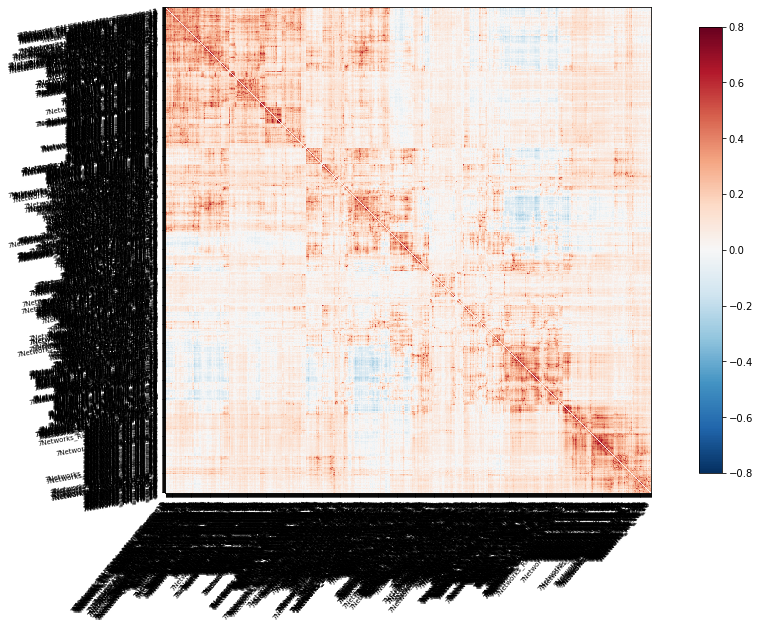

In [7]:
from connectivity_matrix import plot_conn_mat

plot_conn_mat(epic='late', significant_regions=False)

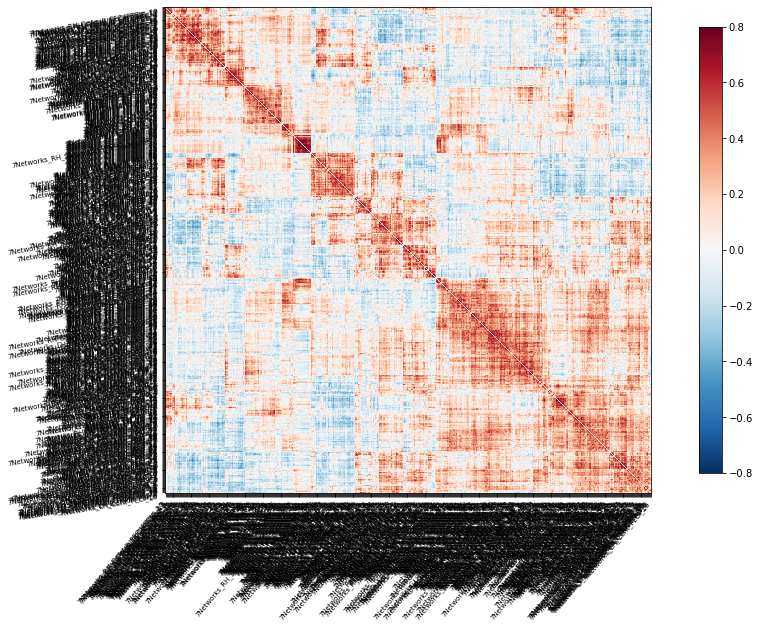

In [3]:
from connectivity_matrix import plot_conn_mat

plot_conn_mat(epic='late', subject=3)

# plot brain

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


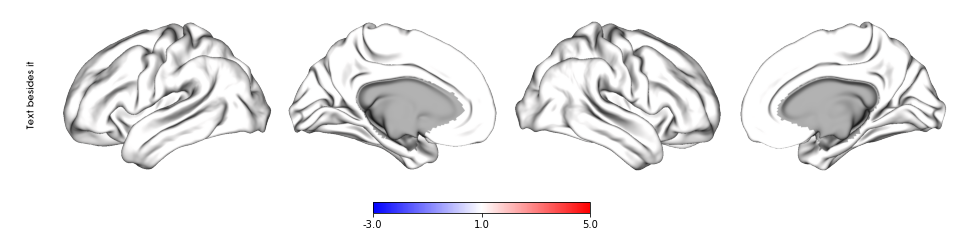

In [9]:
from plot_brain import plot_brain

plot_brain([1] * 998, color_map='bwr',
           color_range=(-3, 5), text='Text besides it')

# gradients and eccentricity

In [10]:
from measures import make_measures

# make_measures()

In [2]:
from measures import get_measures

df = get_measures()

Reading data from data/measures.csv


In [11]:
from measures import get_measures

get_measures(measures=['gradient1'], subjects=[2, 3])

Reading data from data/measures.csv


,region,value,subject,epic,measure
11976,0,0.496790,2,baseline,gradient1
11977,1,0.744780,2,baseline,gradient1
11978,2,0.640861,2,baseline,gradient1
11979,3,0.265293,2,baseline,gradient1
11980,4,-1.252707,2,baseline,gradient1
...,...,...,...,...,...
32929,993,-1.504329,3,late,gradient1
32930,994,-0.944637,3,late,gradient1
32931,995,-1.428845,3,late,gradient1
32932,996,-1.334512,3,late,gradient1


Reading data from data/measures.csv


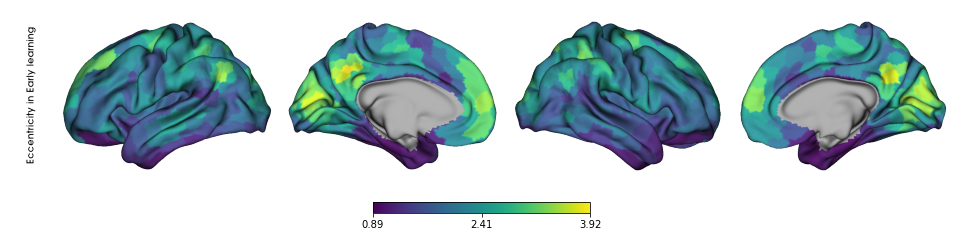

In [12]:
from measures import get_measures_avg

v = get_measures_avg(epic_list=['early'],
             measures=['eccentricity'])

plot_brain(v.value, color_map='viridis', text='Eccentricity in Early learning')

# statistics

## repeated measures ANOVA

Computing repeated measures ANOVA...


100%|██████████| 4990/4990 [00:49<00:00, 100.43it/s]
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


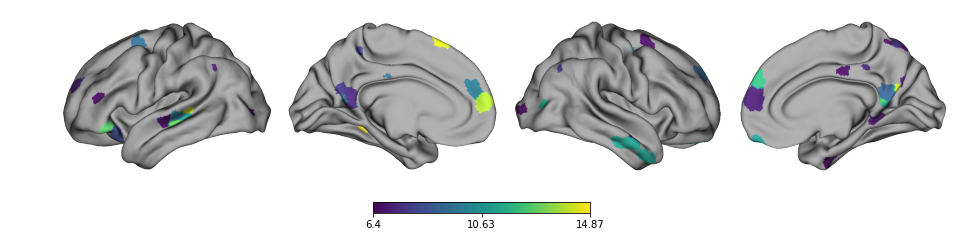

In [3]:
from stats import rm_anova
from plot_brain import plot_brain_masked

df_stats = rm_anova(df)
df_stats_ecc = df_stats[df_stats.measure == 'eccentricity']
plot_brain_masked(df_stats_ecc.F, df_stats_ecc.pvalue_corrected)

In [6]:
df_stats_ecc.fdr_significant.sum()

56

## pairwise t-tests

In [7]:
from stats import pairwise_ttests

df_stats_pairwise = pairwise_ttests(df)
df_stats_pairwise

100%|██████████| 4990/4990 [00:52<00:00, 95.36it/s] 


region     tstat  pvalue_corrected
measure      A        B                                        
eccentricity baseline early       0 -0.234589          0.984866
                      late        0  0.019029          0.984866
             early    late        0  0.250642          0.984866
             baseline early       1 -0.573428          0.661493
                      late        1 -1.000851          0.661493
...                             ...       ...               ...
gradient4    baseline late      996  2.113307          0.056833
             early    late      996  0.149729          0.881365
             baseline early     997  0.748849          0.684301
                      late      997  0.801186          0.684301
             early    late      997  0.041482          0.967018

[14970 rows x 3 columns]

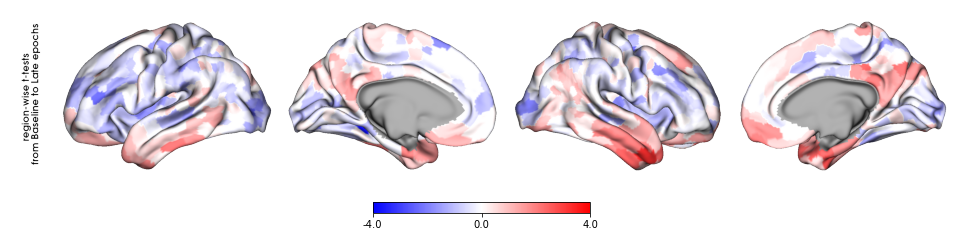

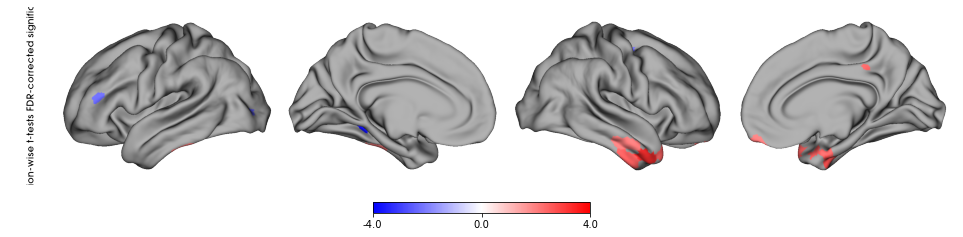

In [14]:
df_contrast = df_stats_pairwise.loc['eccentricity', 'baseline', 'late']

plot_brain(df_contrast['tstat'],
           text='region-wise t-tests \n from Baseline to Late epochs', color_range=(-4, 4), color_map='bwr')
plot_brain_masked(df_contrast['tstat'], df_contrast['pvalue_corrected'],
                  text='region-wise t-tests FDR-corrected significant', color_range=(-4, 4), color_map='bwr')

# seed connectivity
post hoc analysis

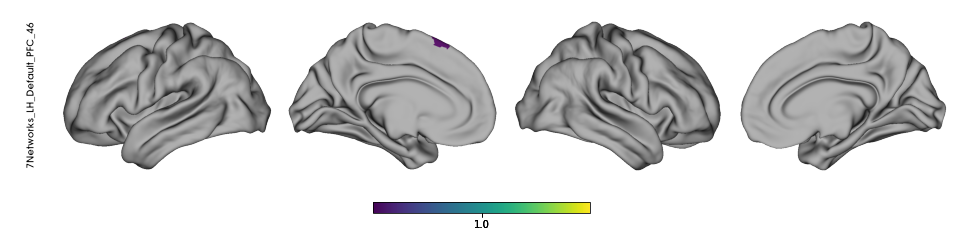

In [18]:
from load_timeseries import spot_region, get_regions_names

sample_region = 460
plot_brain(spot_region(sample_region),
           text=get_regions_names(sample_region)[0])

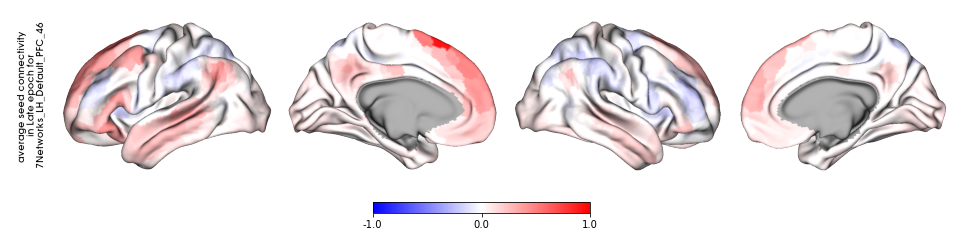

In [19]:
from seed_conn import seed_connectivity, seed_average

df_seed = seed_connectivity(sample_region)
df_seed_avg = seed_average(df_seed)

text = 'average seed connectivity \n in Late epoch for \n' + get_regions_names(sample_region)[0]
plot_brain(df_seed_avg.loc[sample_region, 'late'],
           color_range=(-1, 1), color_map='bwr',
           text=text)

## pairwise t-tests seed

In [20]:
from utils import melt_df

df_seed = melt_df(df_seed)
df_seed_shift = pairwise_ttests(df_seed)

100%|██████████| 998/998 [00:10<00:00, 92.04it/s] 


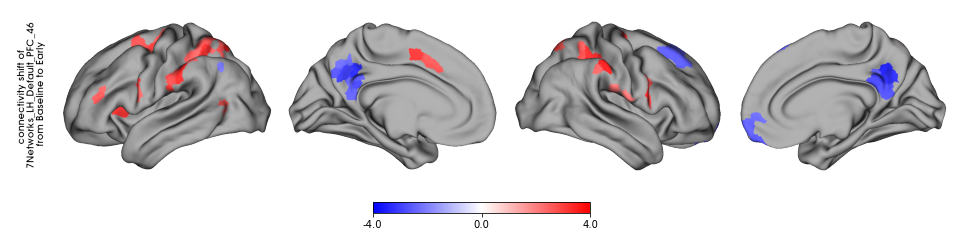

In [21]:
df_seed_shift_ = df_seed_shift.loc['baseline', 'early']

text = 'connectivity shift of \n' + get_regions_names(sample_region)[0] + '\n from Baseline to Early'
plot_brain_masked(df_seed_shift_.tstat, df_seed_shift_.pvalue_corrected,
                  color_range=(-4, 4), color_map='bwr', text=text)